# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [1]:
# Import your libraries
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy import stats

# Challenge 1 - Generate and Plot Normal Distributions

#### Step 1: Generate samples and test normal distribution

Use mean=50, standard_deviation=5, and sample_size=[10, 50, 500, 5000] to generate 4 random samples that are normally distributed. Test your normal distributions with [`scipy.stats.normaltest`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html).


*Hint: Read the documentation for `scipy.stats.normaltest`. The function does not simply return Yes or No for whether your data is normal distribution. It returns the likelihood.*

In [2]:
# Your code here
a = np.random.normal(50,5,10)
b = np.random.normal(50,5,50)
c = np.random.normal(50,5,500)
d = np.random.normal(50,5, 5000)
x = np.concatenate((a, b,c,d))
k2, p = stats.normaltest(x)
print(f"k2 ={k2}, p = {p}")
len(x)

k2 =1.2228805459158025, p = 0.5425688588004276


5560

In [3]:
alpha = 1e-3
if p < alpha:  # null hypothesis: x comes from a normal distribution
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")


The null hypothesis cannot be rejected


#### Interpret the normaltest results and make your observations.

# Explain the test results here
The null hypothesis cannot be rejected. 
This hypothesis is not rejected if the empirical results of the sample are compatible with it.

#### Step 2: Plot normal distributions

Use matplotlib subplots to plot a histogram of each sample. 

*Hints:*
- Use subplots to compare your figures side by side.

- Your output should look like below:

![normal distributions with different sample sizes](ch-1.png)

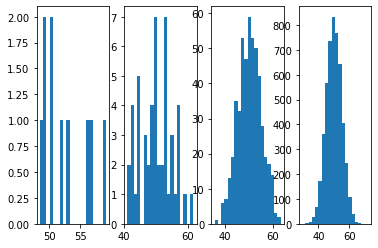

In [14]:
# Your code here
fig=plt.figure()
plt.subplot(1,4,1)
afig=plt.hist(a,bins=20)
plt.subplot(1,4,2)
bfig=plt.hist(b,bins=20)
plt.subplot(1,4,3)
cfig=plt.hist(c,bins=20)
plt.subplot(1,4,4)
dfig=plt.hist(d,bins=20)

#### Compare the distributions above. What do you observe? Explain with the Central Limit Theorem.

# Your comment and explanation here
The central limit theorem establishes that, in some situations, when independent random variables are added, their properly normalized sum tends toward a normal distribution
Then we can observe that normalized sum tends toward a normal distribution

# Challenge 2 - Plot Probability Mass Function (PMF)

#### Background knowledge

[PMF](https://en.wikipedia.org/wiki/Probability_mass_function) shows the probability distribution of a **discrete random variable**. A [discrete random variable](https://en.wikipedia.org/wiki/Random_variable#Discrete_random_variable) has random numeric values that are not continuous. For example, the number of people in a household can only be integers but not floats. Therefore the number of people in a household is a discrete variable.

#### Question: We assume that the probability of clicking an Ad in a Youtube video is 0.15. We have a sample of 5 people who wathched the video and we want to plot the PMF for a binomial distribution.

*Hint: use binom from `scipy.stats.binom`. Your output should look like below:*

![binom 10](ch-2.png)

[0 0 0 0 0] 5


[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Binomial Distribution')]

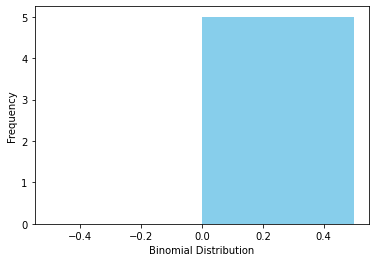

In [23]:
# Your code here
from scipy.stats import binom
data_binom = binom.rvs(n=1,p=0.15,size=5)
print(data_binom[:100],len(data_binom))
ax = sns.distplot(data_binom,
                  kde=False,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Binomial Distribution', ylabel='Frequency')

#### Explain what you observe from the plot above

In [10]:
# Your comment here


#### Now plot PMP with 50, 500, and 5000 visitors.

[0 0 1 0 1 1 1 0 0 0 1 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 1 0 0 0 0 1 0 0 0 0] 50


[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Binomial Distribution')]

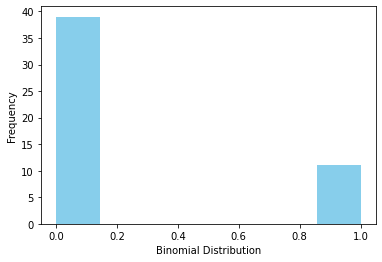

In [11]:
# Your code here
from scipy.stats import binom
data_binom = binom.rvs(n=1,p=0.15,size=50)
print(data_binom[:100],len(data_binom))
ax = sns.distplot(data_binom,
                  kde=False,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Binomial Distribution', ylabel='Frequency')

[0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0] 500


[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Binomial Distribution')]

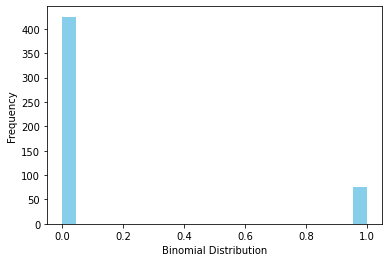

In [12]:
# Your code here
# Your code here
from scipy.stats import binom
data_binom = binom.rvs(n=1,p=0.15,size=500)
print(data_binom[:100],len(data_binom))
ax = sns.distplot(data_binom,
                  kde=False,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Binomial Distribution', ylabel='Frequency')

[0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0
 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 1] 5000


[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Binomial Distribution')]

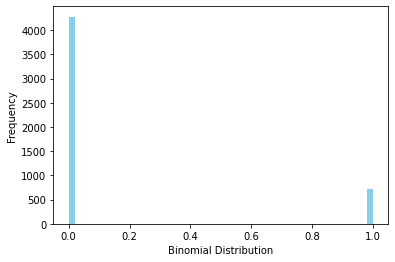

In [13]:
# Your code here
from scipy.stats import binom
data_binom = binom.rvs(n=1,p=0.15,size=5000)
print(data_binom[:100],len(data_binom))
ax = sns.distplot(data_binom,
                  kde=False,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Binomial Distribution', ylabel='Frequency')

#### What did you notice from the distribution plots? Comment your findings.

# Your comment here
It's a binomial function. We only observe there are two bars with "0" and "1"

# Challenge 3

#### Reaserch the Poisson distribution. Write about your own understanding of the Poisson distribution.

In [15]:
# Your comment here


#### A website has an average of 300 visits per day. What is the probability of getting 320 visitors in a day?

*Hint: use `scipy.stats.poisson`*

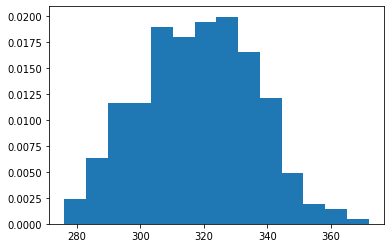

In [16]:
# Your code here
s = np.random.poisson(320, 300)
count, bins, ignored = plt.hist(s, 14, density=True)
plt.show()

#### What is the probability of getting 60 visits?

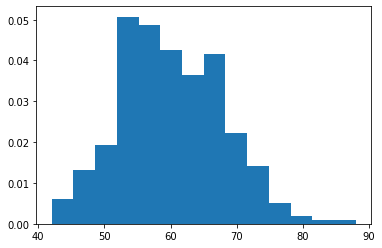

In [17]:
# Your code here
s = np.random.poisson(60, 300)
count, bins, ignored = plt.hist(s, 14, density=True)
plt.show()

#### Plot the distribution of the probability for getting 0-1000 visits.

*Hints:* 

- Create a list to store the Poisson distribution probabilities for n=0 to 1000. Then plot the probabilities.

- Your plot should look like below:

![poisson distribution](ch-3.png)

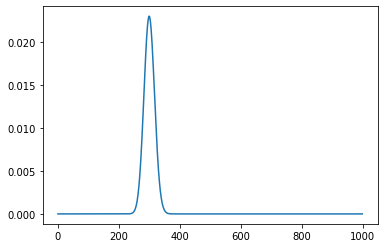

In [26]:
x =scipy.stats.poisson.pmf(range(1000),300)
plt.plot(x)